In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn import decomposition
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics

df = pd.read_excel('Brain Stroke Prediction.xlsx')

# perform ordinal encoding for ordinal features
enc = preprocessing.OrdinalEncoder(dtype=int)
enc.fit(df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]])
df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]] = enc.transform(df[["Age", "What is your normal blood pressure?",
                                                                    "What is work intensity?",
                                                                    "How many hours do you work on average?",
                                                                    "Do you feel starved for company?"]])

# print(enc.categories_)

data = df.to_numpy()

# splitting labels
target = data[:, 18]
# removing timestamps column
data = data[:, 1:18]

# performing binarization of target
target[target == 'Yes'] = 1
target[target == 'No'] = 0

# performing binarization on data
temp = data[:, 0]
temp[temp == "Male"] = 1
temp[temp == "Female"] = 0

temp = data[:, 5:12]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

temp = data[:, 16]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

# calculate BMI from height and weight
data[:, 2] = data[:, 2] / 3.281
data[:, 2] = np.square(data[:, 2])
data[:, 2] = data[:, 3] / data[:, 2]
data = np.delete(data, 3, 1)

# print(data[:10, :])
# print(target)


x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

----------------------------------------------------------------------
Score Train:  0.9196428571428571
Score Test:  0.8133333333333334
Confusion Matrix:
 [[30  9]
 [ 5 31]]
Classification Report:
               precision    recall  f1-score   support

  Not Stroke       0.86      0.77      0.81        39
      Stroke       0.78      0.86      0.82        36

    accuracy                           0.81        75
   macro avg       0.82      0.82      0.81        75
weighted avg       0.82      0.81      0.81        75

----------------------------------------------------------------------
Score Train:  0.5178571428571429
Score Test:  0.48
Confusion Matrix:
 [[ 0 39]
 [ 0 36]]
Classification Report:
               precision    recall  f1-score   support

  Not Stroke       0.00      0.00      0.00        39
      Stroke       0.48      1.00      0.65        36

    accuracy                           0.48        75
   macro avg       0.24      0.50      0.32        75
weighted avg       

C:\Users\DELL 6540\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL 6540\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL 6540\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL 6540\anaconda3\lib\site-packa

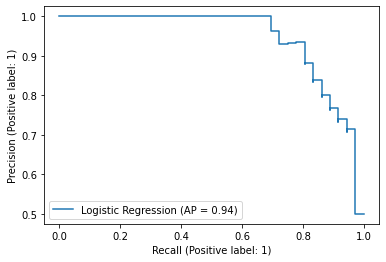

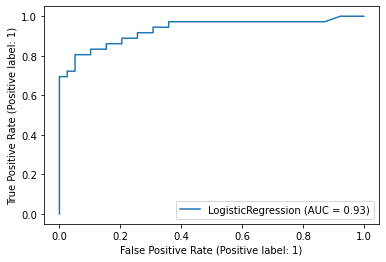

In [12]:
#penalty=l2, dual=False, tolerance=1e-4, C=1.0, fit_intercept=True, solver=lbfgs
#class_weight=None, random_state=None, max_iter-100, multi_class=auto
print("----------------------------------------------------------------------")
clf = LogisticRegression().fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Score Train: ', clf.score(x_train, y_train))
print('Score Test: ', clf.score(x_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['Not Stroke', 'Stroke']))
print("----------------------------------------------------------------------")

#
clf = LogisticRegression(penalty='l1',C=0.01, dual=False, solver='liblinear', multi_class='ovr').fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Score Train: ', clf.score(x_train, y_train))
print('Score Test: ', clf.score(x_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['Not Stroke', 'Stroke']))
print("----------------------------------------------------------------------")

#
clf = LogisticRegression(penalty='elasticnet',C=0.008, l1_ratio=0, dual=False, solver='saga', multi_class='ovr', class_weight='balanced').fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Score Train: ', clf.score(x_train, y_train))
print('Score Test: ', clf.score(x_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['Not Stroke', 'Stroke']))
print("----------------------------------------------------------------------")

clf = LogisticRegression(penalty='l2', C=0.01, dual=False, solver='newton-cg',multi_class='ovr', tol=1e-9, class_weight='balanced').fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Score Train: ', clf.score(x_train, y_train))
print('Score Test: ', clf.score(x_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Stroke', 'Stroke']))
print("----------------------------------------------------------------------")

clf = LogisticRegression(penalty='l2', C=0.01, dual=False, solver='liblinear', multi_class='ovr', class_weight='balanced').fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Score Train: ', clf.score(x_train, y_train))
print('Score Test: ', clf.score(x_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Stroke', 'Stroke']))
print("----------------------------------------------------------------------")

clf.fit(x_test, y_test)
plot_precision_recall_curve(clf, x_test, y_test, name="Logistic Regression")
plt.show()

plot_roc_curve(clf, x_test, y_test)
plt.show()

After applying PCA, score is:  0.6473214285714286


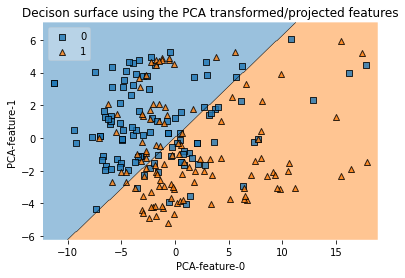

In [103]:
# dimensionality reduction for displaying the decision boundary
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
X = pca.transform(x_train)
clf = LogisticRegression(penalty='l2', C=0.01, dual=False, solver='liblinear', multi_class='ovr', class_weight='balanced')
clf.fit(X, y_train)
print('After applying PCA, score is: ', clf.score(X, y_train))

plot_decision_regions(X, y_train, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('PCA-feature-0')
plt.ylabel('PCA-feature-1')
plt.title('Decison surface using the PCA transformed/projected features')
plt.show()